<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/random_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL
import shutil
import os
import torch
import torchvision
import numpy as np

In [2]:
image_pathes = []
for path, _, files in os.walk('/content/drive/MyDrive/seol/datasets/img256'):
    for file_path in files:
        image_pathes.append(os.path.join(path, file_path))

image_pathes[:5]

['/content/drive/MyDrive/seol/datasets/img256/img00281.png',
 '/content/drive/MyDrive/seol/datasets/img256/img0028.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00279.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00277.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00271.png']

In [3]:
image_pathes

['/content/drive/MyDrive/seol/datasets/img256/img00281.png',
 '/content/drive/MyDrive/seol/datasets/img256/img0028.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00279.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00277.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00271.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00278.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00272.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00273.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00275.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00270.png',
 '/content/drive/MyDrive/seol/datasets/img256/img0027.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00267.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00269.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00266.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00274.png',
 '/content/drive/MyDrive/seol/datasets/img256/img00323.png',
 '/content/drive/MyDrive/s

PIL:                 (240, 180)
PIL->Numpy:          (180, 240, 3)
PIL->tensor:         torch.Size([3, 180, 240])
PIL->tensor->Numpy:  (3, 180, 240)
PIL->tensor->PIL:    torch.Size([3, 180, 240])


<ipython-input-4-f244c78b7b40>:7: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  return torch.as_tensor(np.asarray(pil_image)).permute(2,0,1)


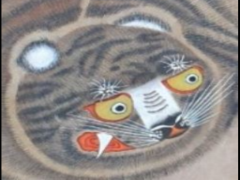

In [4]:
from torchvision.transforms.functional import to_pil_image

def pil_to_tensor(pil_image):
    # PIL: [width, height]
    # -> NumPy: [height, width, channel]
    # -> Tensor: [channel, height, width]
    return torch.as_tensor(np.asarray(pil_image)).permute(2,0,1)

def tensor_to_pil(tensor_image):
    return to_pil_image(tensor_image)

def tensor_to_pltimg(tensor_image):
    return tensor_image.permute(1,2,0).numpy()

pil_image = PIL.Image.open(image_pathes[0]) # (150, 150)

# Tilt size for check where width/height be
pil_image = torchvision.transforms.Resize((180, 240))(pil_image)

print('PIL:                ', pil_image.size)
print('PIL->Numpy:         ', np.array(pil_image).shape)
print('PIL->tensor:        ', pil_to_tensor(pil_image).shape)
print('PIL->tensor->Numpy: ', np.array(pil_to_tensor(pil_image)).shape)
print('PIL->tensor->PIL:   ', pil_to_tensor(tensor_to_pil(pil_to_tensor(pil_image))).shape)
tensor_to_pil(pil_to_tensor(pil_image))

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def make_sample_grid_with_transforms(tf, image_path):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        pil_image = PIL.Image.open(image_path) # shape: (300, 200)
        applied_image = tf(pil_to_tensor(pil_image))
        plt.subplot(3, 3, i+1)
        plt.imshow(tensor_to_pltimg(applied_image))
        plt.axis("off")
    plt.show()

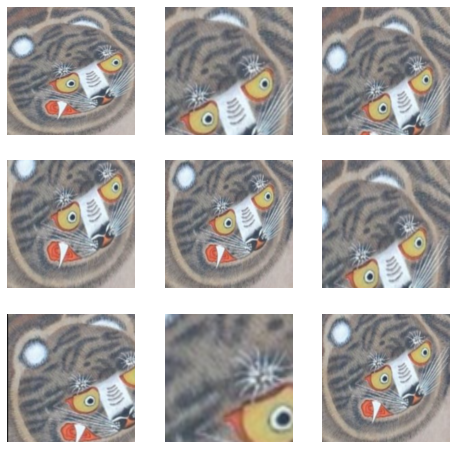

In [6]:
transform = transforms.RandomResizedCrop((256, 256))
make_sample_grid_with_transforms(transform, image_pathes[0])